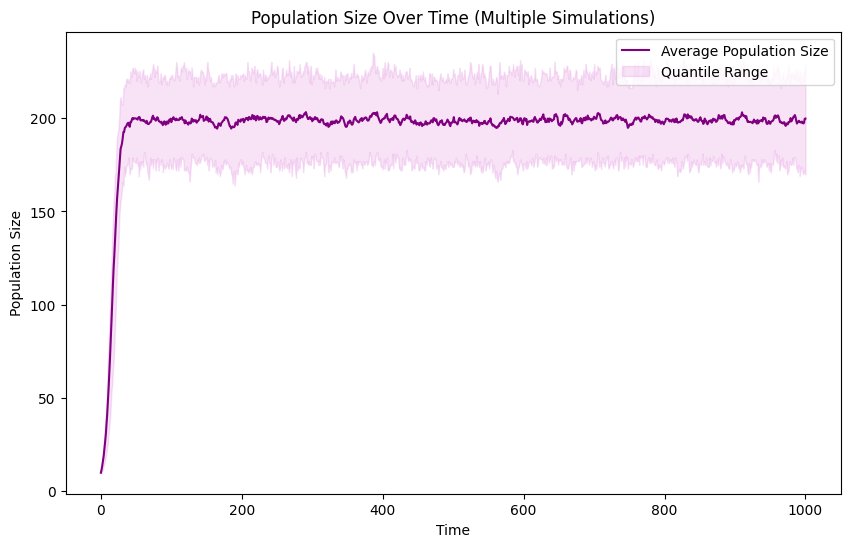

0.0

In [13]:
# size dependant death rate
import numpy as np

def set_parameters_with_size_dependent_death_rate(initial_population, birth_rate, base_death_rate, carrying_capacity):
    return {
        'initial_population': initial_population,
        'birth_rate': birth_rate,
        'base_death_rate': base_death_rate,
        'carrying_capacity': carrying_capacity
    }

def run_simulation_with_size_dependent_death_rate(params):
    population = params['initial_population']
    birth_rate = params['birth_rate']
    base_death_rate = params['base_death_rate']
    carrying_capacity = params['carrying_capacity']
    time_points = [0]
    population_sizes = [population]

    while population > 0:
        time_points.append(time_points[-1] + 1)
        births = np.random.poisson(birth_rate * population)
        size_dependent_death_rate = base_death_rate * (population / carrying_capacity)
        deaths = np.random.poisson(size_dependent_death_rate * population)
        population = max(0, population + births - deaths)
        population_sizes.append(population)

        if len(time_points) > 1000:
            break

    return time_points, population_sizes

def run_multiple_simulations_with_size_dependent_death_rate(params, num_simulations):
    all_time_points = []
    all_population_sizes = []

    for _ in range(num_simulations):
        time_points, population_sizes = run_simulation_with_size_dependent_death_rate(params)
        all_time_points.append(time_points)
        all_population_sizes.append(population_sizes)

    # Calculate quantiles
    max_time = max([max(t) for t in all_time_points])
    all_population_sizes_aligned = np.zeros((num_simulations, max_time+1))

    for i, population_sizes in enumerate(all_population_sizes):
        all_population_sizes_aligned[i, :len(population_sizes)] = population_sizes

    average_population_sizes = np.mean(all_population_sizes_aligned, axis=0)
    lower_quantile = np.percentile(all_population_sizes_aligned, 5, axis=0)
    upper_quantile = np.percentile(all_population_sizes_aligned, 95, axis=0)
    extinction_probability = np.mean(all_population_sizes_aligned[:, -1] == 0)

    return all_time_points, all_population_sizes, average_population_sizes, lower_quantile, upper_quantile, extinction_probability

params = set_parameters_with_size_dependent_death_rate(
    initial_population=10, 
    birth_rate=0.2, 
    base_death_rate=0.1, 
    carrying_capacity=100
)

num_simulations = 100
all_time_points, all_population_sizes, average_population_sizes, lower_quantile, upper_quantile, extinction_probability = run_multiple_simulations_with_size_dependent_death_rate(params, num_simulations)

import matplotlib.pyplot as plt

def plot_multiple_simulations_with_quantiles(time_points, population_sizes, avg_population_sizes, lower_quantile, upper_quantile):
    plt.figure(figsize=(10, 6))
    #for single_run in population_sizes:
    #    plt.plot(single_run, color='gray', alpha=0.5)
    plt.plot(avg_population_sizes, color='purple', label='Average Population Size')
    plt.fill_between(range(len(avg_population_sizes)), lower_quantile, upper_quantile, color='orchid', alpha=0.2, label='Quantile Range')
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.title('Population Size Over Time (Multiple Simulations)')
    plt.legend()
    plt.show()

plot_multiple_simulations_with_quantiles(all_time_points, all_population_sizes, average_population_sizes, lower_quantile, upper_quantile)

extinction_probability
